In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [3]:
#read in task df

path_task = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/PR_task_prepro.csv'
    
task = pd.read_csv(path_task, index_col=0)
task = pd.DataFrame(data = task)

print(task.shape)

task.head(10)

(456, 15)


,date,animal_number,session,trial_num,reinforcement_count,right_lever_press_count,right_lever_press_latency_1st,right_lever_press_latency_ave_bit,left_lever_press_count,left_lever_press_latency_1st,left_lever_press_latency_ave_bit,HE_trial_count,HE_trial_latency_1st,HE_trial_latency_ave_bit,trial_times
0,190807,683,PR_1,0,1,0,0.0,0.0,1,2.26,2.260000,1,0.07,0.070000,2.27
1,190807,683,PR_1,1,1,0,0.0,0.0,2,19.56,20.550000,3,2.20,5.356667,21.55
2,190807,683,PR_1,2,1,0,0.0,0.0,2,14.75,15.055000,4,5.25,8.747500,15.37
3,190807,683,PR_1,3,1,0,0.0,0.0,3,8.77,9.906667,1,10.77,10.770000,11.66
4,190807,683,PR_1,4,1,0,0.0,0.0,4,52.41,55.610000,6,2.29,36.990000,59.47
5,190807,683,PR_1,5,1,0,0.0,0.0,6,7.62,27.160000,15,5.43,37.582667,77.33
6,190807,683,PR_1,6,1,0,0.0,0.0,8,6.02,13.506250,8,8.29,15.078750,21.72
7,190807,683,PR_1,7,1,0,0.0,0.0,11,10.00,18.650909,8,2.38,15.840000,23.81
8,190807,683,PR_1,8,1,0,0.0,0.0,16,7.27,14.709375,7,6.22,11.454286,23.60
9,190807,683,PR_1,9,1,0,0.0,0.0,23,1.38,14.518696,12,0.64,7.664167,29.45


In [4]:
path_animal_info = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/assignments/PR_round1.xlsx'
  
animal_info = pd.read_excel(path_animal_info)
animal_info = pd.DataFrame(data = animal_info)

animal_info.rename(columns={"animal": "animal_number"}, inplace=True)
print(animal_info.shape)

animal_info.head()

(17, 4)


,animal_number,lever,cage,group
0,683,2,1,2
1,684,2,2,1
2,685,2,2,1
3,686,1,2,1
4,687,2,3,1


In [5]:
df_final = (task.merge(animal_info,
                on=['animal_number'], how='left'))
df_final.head()

,date,animal_number,session,trial_num,reinforcement_count,right_lever_press_count,right_lever_press_latency_1st,right_lever_press_latency_ave_bit,left_lever_press_count,left_lever_press_latency_1st,left_lever_press_latency_ave_bit,HE_trial_count,HE_trial_latency_1st,HE_trial_latency_ave_bit,trial_times,lever,cage,group
0,190807,683,PR_1,0,1,0,0.0,0.0,1,2.26,2.260000,1,0.07,0.070000,2.27,2,1,2
1,190807,683,PR_1,1,1,0,0.0,0.0,2,19.56,20.550000,3,2.20,5.356667,21.55,2,1,2
2,190807,683,PR_1,2,1,0,0.0,0.0,2,14.75,15.055000,4,5.25,8.747500,15.37,2,1,2
3,190807,683,PR_1,3,1,0,0.0,0.0,3,8.77,9.906667,1,10.77,10.770000,11.66,2,1,2
4,190807,683,PR_1,4,1,0,0.0,0.0,4,52.41,55.610000,6,2.29,36.990000,59.47,2,1,2


In [51]:
#make new df with combined data

pr_df_trial = pd.DataFrame()

animals = df_final['animal_number'].unique()

for animal in animals:
    
    #get animal data
    animal_data = df_final[df_final['animal_number'] == animal]
    
    #generate session df
    sessions = animal_data['session'].unique()
    
    for session in sessions:
        #get session data for animal
        animal_data_session = animal_data[animal_data['session'] == session]
        
        #compute and fill session data
        if animal_data_session['lever'].unique() == 1:
            animal_data_session['lever_press_count'] = animal_data_session['right_lever_press_count']
            animal_data_session['lever_press_latency_1st'] = animal_data_session['right_lever_press_latency_1st']
            animal_data_session['lever_press_latency_ave'] = animal_data_session['right_lever_press_latency_ave_bit']

        elif animal_data_session['lever'].unique() == 2:
            animal_data_session['lever_press_count'] = animal_data_session['left_lever_press_count']
            animal_data_session['lever_press_latency_1st'] = animal_data_session['left_lever_press_latency_1st']
            animal_data_session['lever_press_latency_ave'] = animal_data_session['left_lever_press_latency_ave_bit']
            
        pr_df_trial = pr_df_trial.append(animal_data_session)
        
pr_df_trial.reset_index(inplace=True, drop=True)    
pr_df_trial = pr_df_trial[['date', 'animal_number', 'lever', 'cage', 'group', 'session', 'trial_num',
       'reinforcement_count', 'trial_times',
       'HE_trial_count', 'HE_trial_latency_1st',
       'HE_trial_latency_ave_bit',
       'lever_press_count', 'lever_press_latency_1st',
       'lever_press_latency_ave']]
pr_df_trial.head()

,date,animal_number,lever,cage,group,session,trial_num,reinforcement_count,trial_times,HE_trial_count,HE_trial_latency_1st,HE_trial_latency_ave_bit,lever_press_count,lever_press_latency_1st,lever_press_latency_ave
0,190807,683,2,1,2,PR_1,0,1,2.27,1,0.07,0.070000,1,2.26,2.260000
1,190807,683,2,1,2,PR_1,1,1,21.55,3,2.20,5.356667,2,19.56,20.550000
2,190807,683,2,1,2,PR_1,2,1,15.37,4,5.25,8.747500,2,14.75,15.055000
3,190807,683,2,1,2,PR_1,3,1,11.66,1,10.77,10.770000,3,8.77,9.906667
4,190807,683,2,1,2,PR_1,4,1,59.47,6,2.29,36.990000,4,52.41,55.610000


In [54]:
pr_df_trial_unstack = pr_df_trial
pr_df_trial_unstack

date  lever  cage  reinforcement_count  trial_times  HE_trial_count  HE_trial_latency_1st  HE_trial_latency_ave_bit  lever_press_count  lever_press_latency_1st  lever_press_latency_ave
animal_number group session trial_num                                                                                                                                                                                            
683           2     PR_1    0          190807      2     1                    1         2.27               1                  0.07                  0.070000                  1                     2.26                 2.260000
                            1          190807      2     1                    1        21.55               3                  2.20                  5.356667                  2                    19.56                20.550000
                            2          190807      2     1                    1        15.37               4                  5.25                  8.747500                  2                    14.75                15.055000
                            3          190807      2     1                    1        11.66               1                 10.77                 10.770000                  3                     8.77                 9.906667
                            4          190807      2     1                    1        59.47               6                  2.29                 36.990000                  4                    52.41                55.610000
                            5          190807      2     1                    1        77.33              15                  5.43                 37.582667                  6                     7.62                27.160000
                            6          190807      2     1                    1        21.72               8                  8.29                 15.078750                  8                     6.02                13.506250
                            7          190807      2     1                    1        23.81               8                  2.38                 15.840000                 11                    10.00                18.650909
                            8          190807      2     1                    1        23.60               7                  6.22                 11.454286                 16                     7.27                14.709375
                            9          190807      2     1                    1        29.45              12                  0.64                  7.664167                 23                     1.38                14.518696
                            10         190807      2     1                    1       322.97              75                  3.82                147.011600                 32                    12.53               171.118750
                            11         190807      2     1                    1       113.12              24                  4.41                 78.535000                 45                    75.38                95.670444
                            12         190807      2     1                    1       215.04              77                 17.36                117.525844                 63                    37.10               117.978571
                            13         190807      2     1                    1       449.44              77                 20.81                199.770909                 89                    78.34               164.684831
                            14         190807      2     1                    1       442.96              98                 37.76                256.308776                125                    44.31               170.812000
                            15         190807      2     1                    1      1106.18             285                 46.35                578.074632                176                    58.1

In [59]:
#create df with trials unstacked and save

pr_df_trial_unstack = pr_df_trial.unstack(-1).reset_index()

pr_df_trial_unstack.to_csv('pr_df_trial_unstack.csv')

pr_df_trial_unstack.head()

animal_number group session      date                                                                                                                                                                               lever                                                                                          cage                                                                                          reinforcement_count                                                                                          trial_times                                                                                                                                        HE_trial_count                                                                                                       HE_trial_latency_1st                                                                                                                       HE_trial_latency_ave_bit                                              \
trial_num                                     0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17  18     0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17  18    0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17  18                   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17  18           0      1      2      3      4      5      6       7       8       9      10      11      12      13      14       15      16      17  18              0    1    2    3    4     5    6     7     8     9    10    11    12    13    14     15    16    17  18                    0     1      2      3     4     5      6      7      8     9     10     11     12     13     14     15    16     17  18                        0         1        2      3      4          5   
0                   683     2    PR_1  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0  190807.0       NaN       NaN NaN   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  NaN  NaN NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  NaN  NaN NaN                 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  NaN  NaN NaN        2.27  21.55  15.37  11.66  59.47  77.33  21.72   23.81   23.60   29.45  322.97  113.12  215.04  449.44  442.96  1106.18     NaN     NaN NaN            1.0  3.0  4.0  1.0  6.0  15.0  8.0   8.0   7.0  12.0  75.0  24.0  77.0  77.0  98.0  285.0   NaN   NaN NaN                 0.07  2.20   5.25  10.77  2.29  5.43   8.29   2.38   6.22  0.64   3.82   4.41  17.36  20.81  37.76  46.35   NaN    NaN NaN                     0.07  5.356667   8.7475  10.77  36.99  37.582667   
1                   683     2    PR_2  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0  190808.0       NaN       NaN NaN   2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  NaN  NaN NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  NaN  NaN NaN                 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  NaN  NaN NaN        5.98  11.99  22.58   1.72   3.39  14.25  37.87   33.32  133.77   22.75  160.14  113.28  164.92  434.33  319.46  1569.29     NaN     NaN NaN            0.0  0.0  1.0  0.0  0.0   0.0  1.0   8.0   9.0   1.0  24.0  20.0  18.0  42.0  21.0  140.0   NaN   NaN NaN                 0.00  0.00  20.88   0.00  0.00  0.00  34.14   7.15  13.06  2.66   5.95   7.29   9.63  13.91   5.94  55.49   NaN    NaN NaN                     0.00  0.000000  20.8800   0.00   0.00   0.000000   
2                   684     1 

In [60]:
#create df with sum and mean of each session and save

pr_df_session_sum = pr_df_trial.groupby(['session', 'group', 'animal_number']).sum().reset_index()

pr_df_session_ave = pr_df_trial.groupby(['session', 'group', 'animal_number']).mean().reset_index()

pr_df_session_sum.to_csv('pr_df_session_sum.csv')
pr_df_session_ave.to_csv('pr_df_session_ave.csv')

pr_df_session_ave.head()

,session,group,animal_number,date,lever,cage,reinforcement_count,trial_times,HE_trial_count,HE_trial_latency_1st,HE_trial_latency_ave_bit,lever_press_count,lever_press_latency_1st,lever_press_latency_ave
0,PR_1,1,684,190807.0,2.0,2.0,1.0,166.862667,19.266667,9.756667,75.186437,28.666667,32.659333,89.310845
1,PR_1,1,685,190807.0,2.0,2.0,1.0,162.356667,14.388889,14.291111,79.611893,66.888889,21.133333,87.330241
2,PR_1,1,686,190807.0,1.0,2.0,1.0,182.912353,16.588235,8.489412,85.467271,50.235294,10.614118,82.109385
3,PR_1,1,687,190807.0,2.0,3.0,1.0,149.948750,18.687500,11.280625,86.110428,37.875000,27.212500,85.910723
4,PR_1,1,688,190807.0,1.0,3.0,1.0,222.772500,9.833333,18.289167,104.898782,12.750000,19.016667,111.294493


trial_num


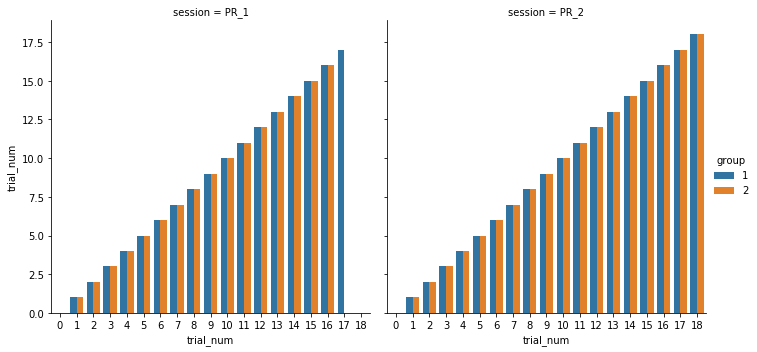

reinforcement_count


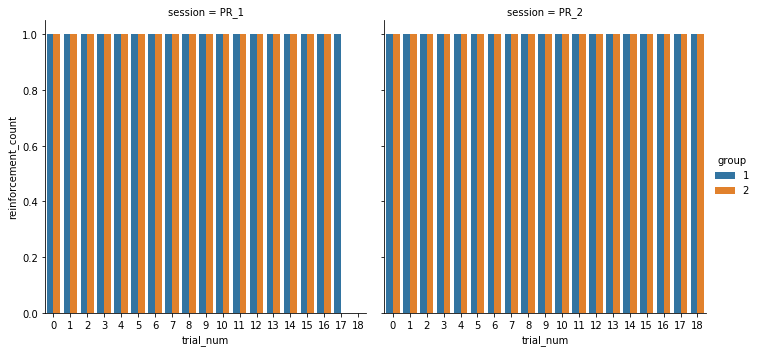

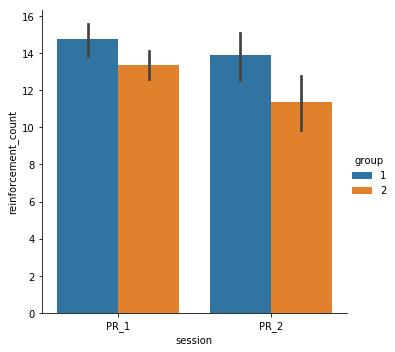

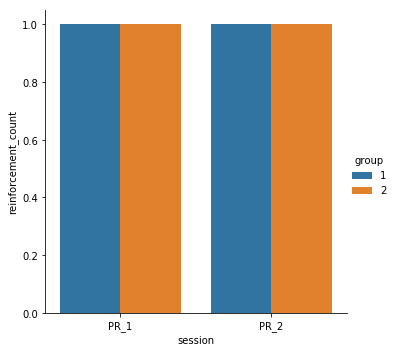

trial_times


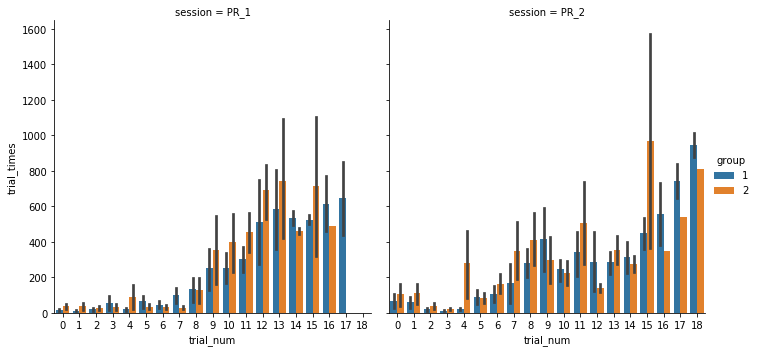

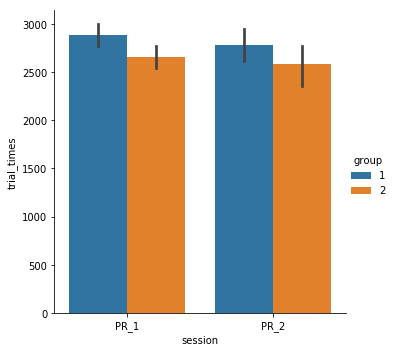

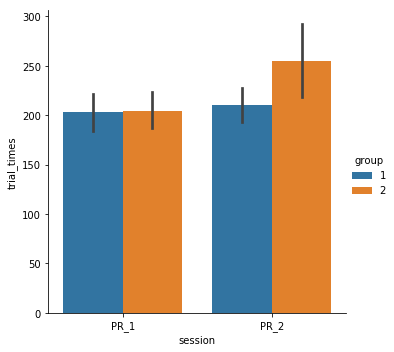

HE_trial_count


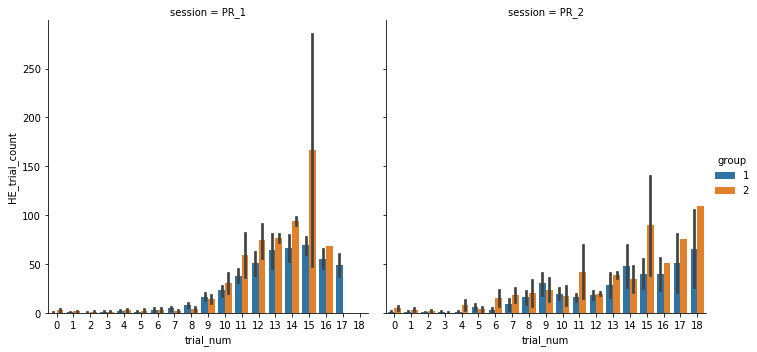

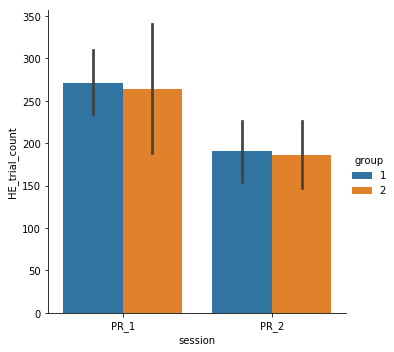

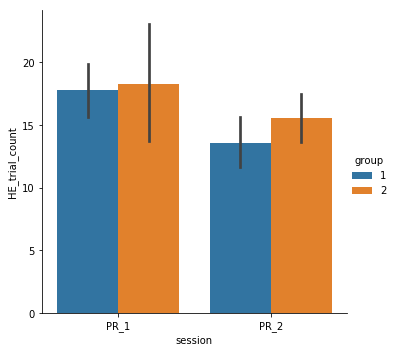

HE_trial_latency_1st


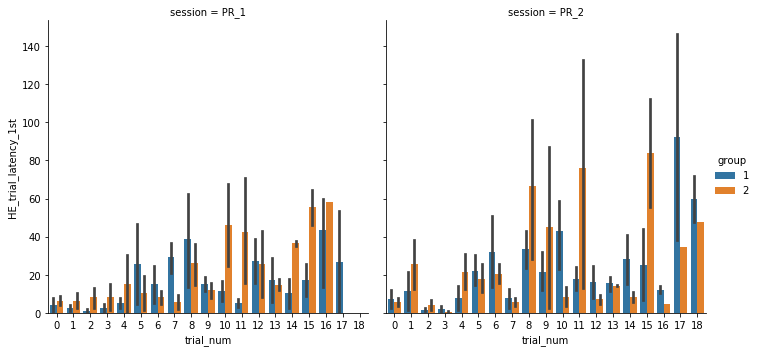

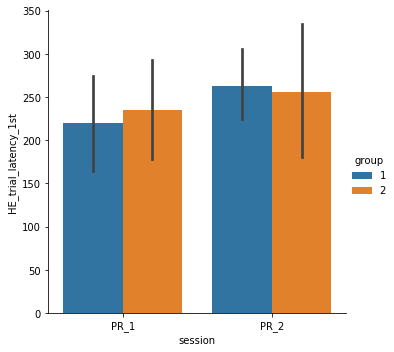

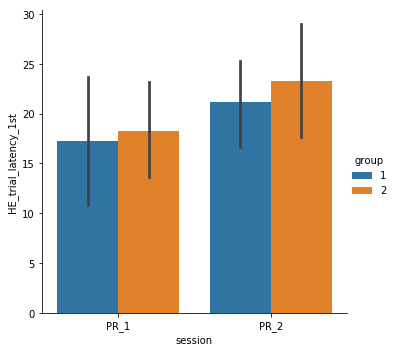

HE_trial_latency_ave_bit


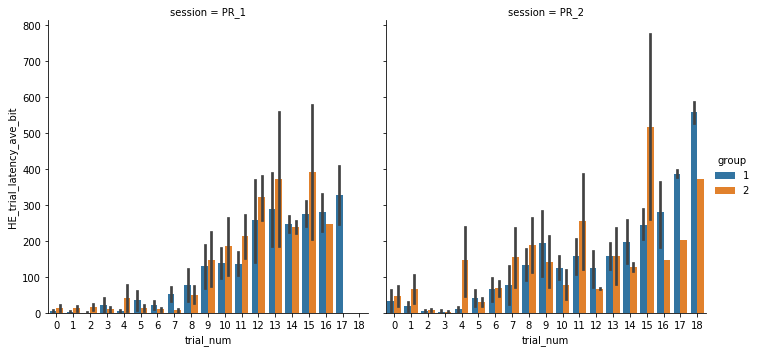

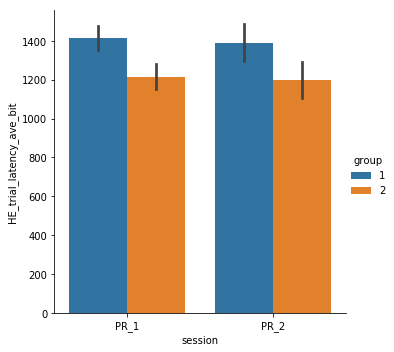

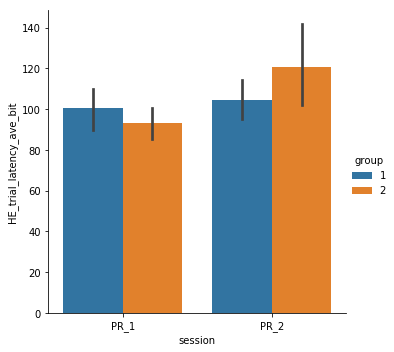

lever_press_count


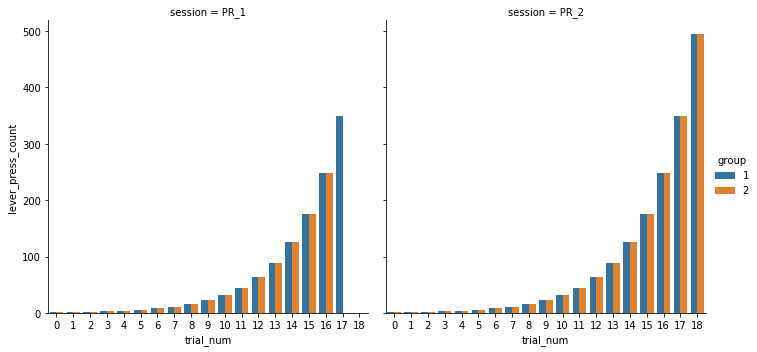

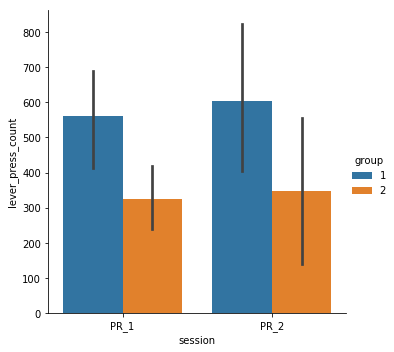

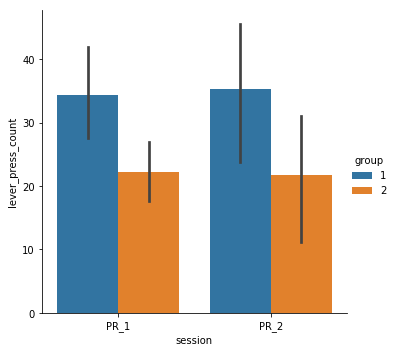

lever_press_latency_1st


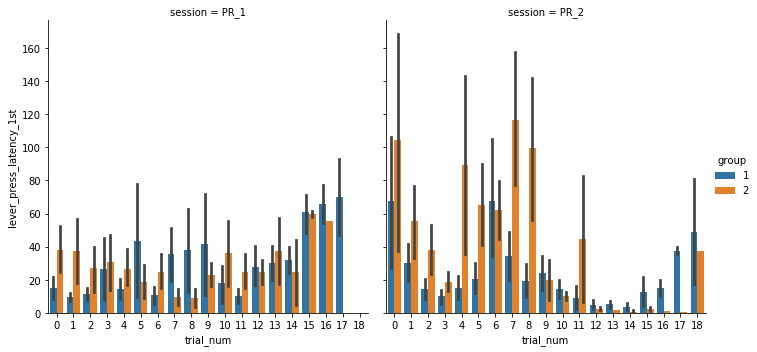

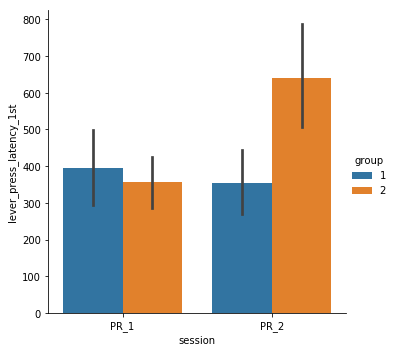

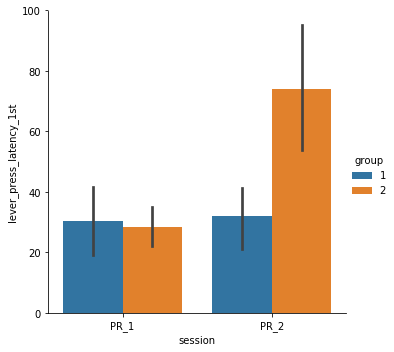

lever_press_latency_ave


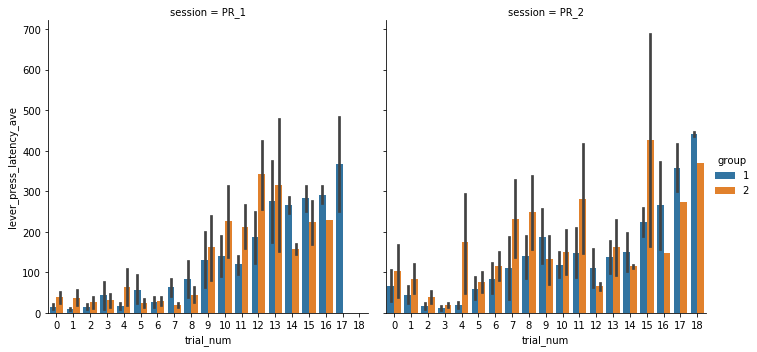

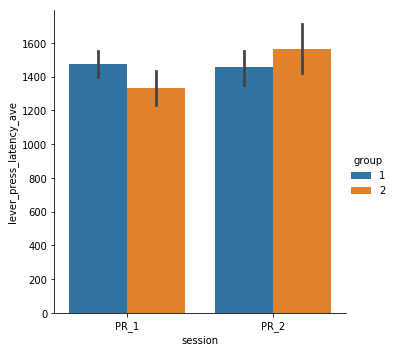

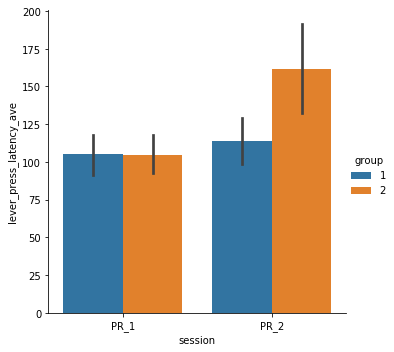

In [64]:
#viz

params = ['trial_num', 'reinforcement_count', 'trial_times',
       'HE_trial_count', 'HE_trial_latency_1st',
       'HE_trial_latency_ave_bit', 'lever_press_count',
       'lever_press_latency_1st', 'lever_press_latency_ave']

for param in params:
    print(param)
    
    try:
        sns.catplot(x='trial_num', y=param, data=pr_df_session, hue='group', ci=68, col='session', kind='bar')
        plt.show()
    except:
        pass
    try:
        sns.catplot(x='session', y=param, data=pr_df_session_sum, hue='group', ci=68, kind='bar')
        plt.show()
    except:
        pass
    try:
        sns.catplot(x='session', y=param, data=pr_df_session_ave, hue='group', ci=68, kind='bar')
        plt.show()
    except:
        pass